# Module 5 In-Class Exercises: k-Nearest Neighbors (k-NN)

### In this exerices, we are going to conudct k-Nearest Neighbors classification using sklearn KNeigborsClassifier package.


In [1]:
# import required packages for this chapter

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


## Pima Indians Diabetes


In [2]:
# create dataframe diabetes_df from diabetes.csv. This file can be downloaded from Canvas.

diabetes_df = pd.read_csv("C:/Users/erwin/Desktop/HW/diabetes.csv")

print(diabetes_df.head())
print("\n",diabetes_df.shape)
print("\n",diabetes_df.count())
print("\n",diabetes_df.describe())

# we can see that there are several missing values and a few other ways to clean up the data

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 (768, 9)

 Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dt

In [3]:
# we're going to clean the data a bit. Starting with dropping the empty datacells. we're going to arbitrarily keep the rows with less than 2 missing values.

diabetes_df = diabetes_df.dropna(thresh = len(diabetes_df.columns)-2)
print (diabetes_df.count())
print(diabetes_df.shape)

Pregnancies                 733
Glucose                     728
BloodPressure               731
SkinThickness               541
Insulin                     394
BMI                         731
DiabetesPedigreeFunction    733
Age                         733
Outcome                     733
dtype: int64
(733, 9)


In [4]:
# it looks like Glucose is missing some data points. We can fix that by replacing the missing data with the mean of the entire column
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace = True)

# lets now do the same with the other columns that have missing data points. 

diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace = True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean(), inplace = True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].mean(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean(), inplace = True)

print(diabetes_df.count())
print(diabetes_df.shape)

Pregnancies                 733
Glucose                     733
BloodPressure               733
SkinThickness               733
Insulin                     733
BMI                         733
DiabetesPedigreeFunction    733
Age                         733
Outcome                     733
dtype: int64
(733, 9)


In [5]:
#now that the data is clean, let's split it (80 percent in training set, 20 percent in validation set. 80/20 is an arbitrary choice, but the more training data,
#the closer your estimates are real sample data

train_df, valid_df = train_test_split(diabetes_df, test_size = 0.2, random_state = 10)
print('Training set: ', train_df.shape, 'Validation set: ', valid_df.shape)

Training set:  (586, 9) Validation set:  (147, 9)


In [6]:
# first we'll partition the dataset into two parts, predictors(X) & outcome (Y)
outcome = 'Outcome'
predictors = list(train_df.columns) #get everything from the training dataset & then remove everything from the outcome column
predictors.remove(outcome)

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

train_X = scaler.transform(train_df[predictors])
valid_X = scaler.transform(valid_df[predictors])

train_y = train_df[outcome]
valid_y = valid_df[outcome]

print(train_X, valid_X) #they're no longer dataframes, they're arrays. So we cant use the .head function

[[ 0.35821254  0.28847142  0.7630885  ...  0.92564715  1.36561741
   0.34519018]
 [-0.52999289 -1.01922408 -0.1972522  ... -0.76942196 -1.1567077
  -0.94596799]
 [ 1.83855493  0.02693232 -0.35730899 ... -0.20918726 -0.65571775
   0.68949903]
 ...
 [-0.82606137 -1.08460885 -0.83747934 ... -0.39593216 -0.18079086
  -0.85989078]
 [-0.23392441  1.59616692 -0.67742256 ...  0.2648575  -0.37191998
  -0.2573503 ]
 [-1.12212985 -0.56153065 -0.67742256 ... -0.697597   -0.0881222
  -0.85989078]] [[ 0.65428102  0.05962471 -0.03719542 ...  0.13557256  0.71983268
   0.08695855]
 [ 0.35821254  1.46539737  0.28291815 ...  1.87373665 -0.41825431
  -0.51558193]
 [ 1.24641798 -0.39806872  0.28291815 ... -0.68323201  0.45051439
  -0.17127309]
 ...
 [ 0.65428102 -0.9538393  -0.83747934 ... -0.09426732 -1.1567077
   1.11988508]
 [-0.52999289 -0.49614588 -1.3176497  ... -0.52521709 -0.16920728
  -0.94596799]
 [ 0.35821254 -1.57499467 -0.99753613 ... -0.84124692 -0.62675879
  -0.51558193]]


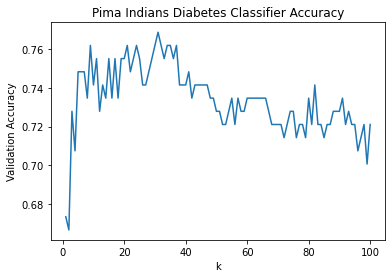

In [7]:
# we want to make a k-nearest classifier, so we need to find out what the k should be.

#lets make a model to find the optimal k value to get the best classification accuracy

k_list = range(1,101,1) #we'll pick a number between 1 & 100, incrementing by 1

accuracies = [] #we'll store the accuracies into this empty array

for k in k_list: #next we'll make a for loop and inside it we'll make classifiers
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_X, train_y)
    accuracies.append(classifier.score(valid_X, valid_y))
    
#for every k ranging from 1 to 100, we'll build a classifier, fit the dataset into the classifier, and calculate the performance score/accuracy for each.
#we'll then store each score in the accuracy array.

#Next the easiest thing to do is plot the information into a graph

plt.plot(k_list, accuracies) #x is the range in k-list, y is the accuracy value
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Pima Indians Diabetes Classifier Accuracy")
plt.show()

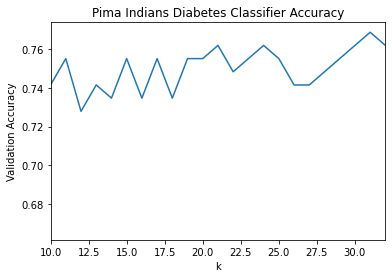

0.7482993197278912 0.7619047619047619 0.7619047619047619


In [8]:
plt.plot(k_list, accuracies) #x is the range in k-list, y is the accuracy value
plt.xlim([10,32]) #we want to take a look at the range of accuracies between 10 - 32 as it seems there's a high accuracy there
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Pima Indians Diabetes Classifier Accuracy")
plt.show()


print(accuracies[21],accuracies[23],accuracies[31])

#it seems like these three accuracies are the most accurate. Since 31 & 23 are the most accurate we'll pick the lower one of the two to prevent underfitting.

#k = 23

Consider the following person:

Pregnancies=3, Glucose=120 ,BloodPressure=72, SkinThickness = 20, Insulin = 84, BMI = 26.2, DiabetesPedigree = 0.267, and Age = 30.  How would this customer be classified?


In [9]:
newpatient = pd.DataFrame([{'Pregnancies': 3, 'Glucose': 120, 'BloodPressure': 72, 'SkinThickness': 20, 'Insulin': 84, 'BMI': 26.2, 'DiabetesPedigree': 0.267, 'Age': 30}],
                         columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age'])

print(newpatient)

#put the new patient into a dataframe and then scale it

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      120             72             20       84  26.2   

   DiabetesPedigree  Age  
0             0.267   30  


In [10]:
newpatient = pd.DataFrame(scaler.transform(newpatient), columns=newpatient.columns)
print(newpatient)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.233924 -0.038452      -0.037195      -0.959693 -0.791716 -0.927437   

   DiabetesPedigree      Age  
0         -0.629655 -0.25735  


C:\Users\erwin\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DiabetesPedigree
Feature names seen at fit time, yet now missing:
- DiabetesPedigreeFunction

  warnings.warn(message, FutureWarning)


In [11]:
classifier_new = KNeighborsClassifier(n_neighbors=23)
#after building your classifier, fit it with the training data
classifier_new.fit(train_X, train_y)

print(classifier_new.predict(newpatient))
print(classifier_new.predict_proba(newpatient))

#based on the results, the patient does not have diabetes (0 instead of 1).
#around 91% of the neighbors do not have diabetes, 9% of the neighbors do have diabetes.

[0]
[[0.91304348 0.08695652]]


C:\Users\erwin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\erwin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
